# Straightness at 90 deg
The striaghtness of the outer cylinder of Wecan sample 1 was measured 8 times. The part was aligned with the stamped "1" close to 0 deg on table.

Angle  direction    file   
0       Outer     S3_A_out.txt  
180     Inner     S3_A_opp.txt    

90      Outer  
270     Inner  
 
180     Outer  
0       Inner  

270     Outer  
90      Inner  

Each pair is measured on the same part of cylinder but with opposite probe direction. THis is equivament to the classic straignteness reversal method and allows the straightness of the part and machine to be separated.

The part was aligned and centered to better than 0.5 µm then delibertely unleveled by setting LX and LY to 0.002 mm. This was to assess the effect of levelling on the determination of the paralleism of the spindle-axis to the z-axis.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from roundness.processing.read_roundpak import read_RA2200_df
import roundness.analysis.straightness as ras

In [2]:
DATA_DIR = Path(r"C:\Users\e.howick\gits\ls_RA2200\spindle_parallesism_2021-05\data\raw")
files = sorted(list(DATA_DIR.glob("S3_?_o??.txt")))
files

[WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_A_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_A_out.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_B_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_B_out.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_C_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_C_out.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_D_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S3_D_out.txt')]

In [3]:
out_A = read_RA2200_df(files[0], drop_cols=['Curve No.', 'Delete Flag'])
opp_A = read_RA2200_df(files[1], drop_cols=['Curve No.', 'Delete Flag'])
out_B = read_RA2200_df(files[2], drop_cols=['Curve No.', 'Delete Flag'])
opp_B = read_RA2200_df(files[3], drop_cols=['Curve No.', 'Delete Flag'])
out_C = read_RA2200_df(files[4], drop_cols=['Curve No.', 'Delete Flag'])
opp_C = read_RA2200_df(files[5], drop_cols=['Curve No.', 'Delete Flag'])
out_D = read_RA2200_df(files[6], drop_cols=['Curve No.', 'Delete Flag'])
opp_D = read_RA2200_df(files[7], drop_cols=['Curve No.', 'Delete Flag'])

In [4]:
SA = ras.straighness_reversal(out_A, opp_A)
SB = ras.straighness_reversal(out_B, opp_B)
SC = ras.straighness_reversal(out_C, opp_C)
SD = ras.straighness_reversal(out_D, opp_D)

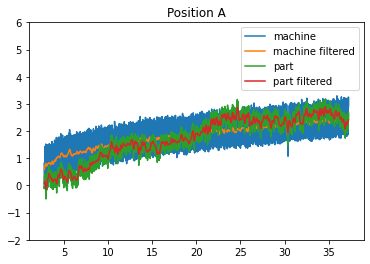

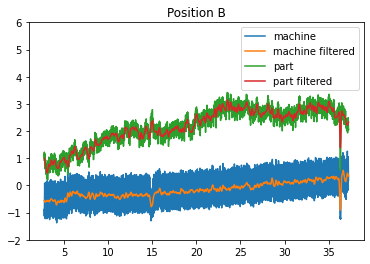

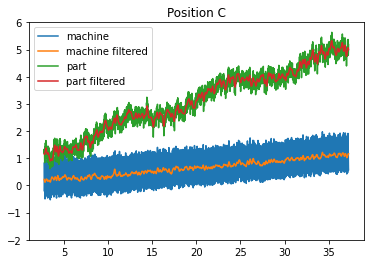

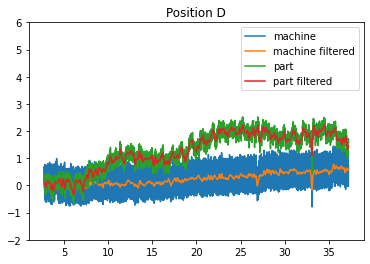

In [5]:
SA.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position A", ylim=(-2.0, 6.0));
SB.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position B", ylim=(-2.0, 6.0));
SC.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position C", ylim=(-2.0, 6.0));
SD.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position D", ylim=(-2.0, 6.0));

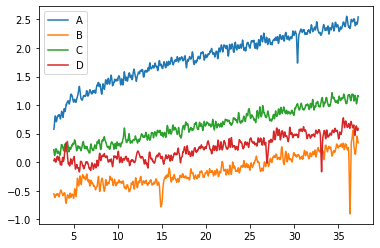

In [6]:
# plot all machine profiles on same plot
plt.plot(SA.index, SA['machine filtered'], label="A");
plt.plot(SB.index, SB['machine filtered'], label="B");
plt.plot(SC.index, SC['machine filtered'], label="C");
plt.plot(SD.index, SD['machine filtered'], label="D");
plt.legend();

In [7]:
# slopes
mA, cA = np.polyfit(SA.index, SA['machine filtered'], 1)
mB, cB = np.polyfit(SB.index, SB['machine filtered'], 1)
mC, cC = np.polyfit(SC.index, SC['machine filtered'], 1)
mD, cD = np.polyfit(SD.index, SD['machine filtered'], 1)

In [8]:
m3 = np.array((mA, mB, mC, mD))
m3

array([0.04248129, 0.02358381, 0.0281366 , 0.01943517])

In [9]:
m3.mean(), m3.std(ddof=1)

(0.02840921828660007, 0.01003187538851721)

need uncertainties on slope to determine significance  
also need to repeat with good levelling  
intutition says averaging over 4 measurements like this remove the effect of bad levelling but I haven't proved it  



# Repeat with better levelling/centering

In [10]:
files = sorted(list(DATA_DIR.glob("S4_?_o??.txt")))
files

[WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_A_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_A_out.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_B_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_B_out.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_C_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_C_out.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_D_opp.txt'),
 WindowsPath('C:/Users/e.howick/gits/ls_RA2200/spindle_parallesism_2021-05/data/raw/S4_D_out.txt')]

In [11]:
out_A = read_RA2200_df(files[0], drop_cols=['Curve No.', 'Delete Flag'])
opp_A = read_RA2200_df(files[1], drop_cols=['Curve No.', 'Delete Flag'])
out_B = read_RA2200_df(files[2], drop_cols=['Curve No.', 'Delete Flag'])
opp_B = read_RA2200_df(files[3], drop_cols=['Curve No.', 'Delete Flag'])
out_C = read_RA2200_df(files[4], drop_cols=['Curve No.', 'Delete Flag'])
opp_C = read_RA2200_df(files[5], drop_cols=['Curve No.', 'Delete Flag'])
out_D = read_RA2200_df(files[6], drop_cols=['Curve No.', 'Delete Flag'])
opp_D = read_RA2200_df(files[7], drop_cols=['Curve No.', 'Delete Flag'])

In [12]:
SA = ras.straighness_reversal(out_A, opp_A)
SB = ras.straighness_reversal(out_B, opp_B)
SC = ras.straighness_reversal(out_C, opp_C)
SD = ras.straighness_reversal(out_D, opp_D)

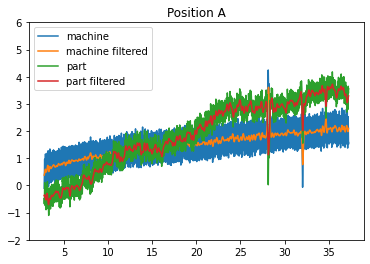

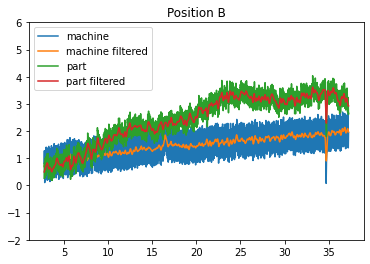

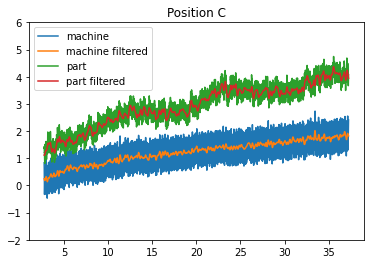

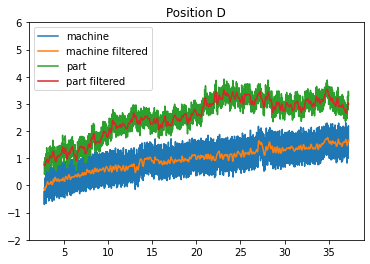

In [13]:
SA.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position A", ylim=(-2.0, 6.0));
SB.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position B", ylim=(-2.0, 6.0));
SC.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position C", ylim=(-2.0, 6.0));
SD.plot(y=['machine', 'machine filtered','part', 'part filtered'], title = "Position D", ylim=(-2.0, 6.0));

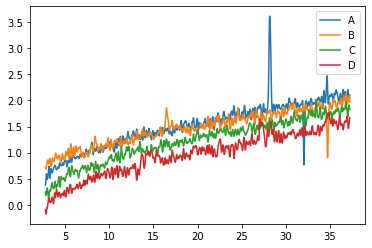

In [14]:
# plot all machine profiles on same plot
plt.plot(SA.index, SA['machine filtered'], label="A");
plt.plot(SB.index, SB['machine filtered'], label="B");
plt.plot(SC.index, SC['machine filtered'], label="C");
plt.plot(SD.index, SD['machine filtered'], label="D");
plt.legend();

In [15]:
# slopes
mA, cA = np.polyfit(SA.index, SA['machine filtered'], 1)
mB, cB = np.polyfit(SB.index, SB['machine filtered'], 1)
mC, cC = np.polyfit(SC.index, SC['machine filtered'], 1)
mD, cD = np.polyfit(SD.index, SD['machine filtered'], 1)

In [16]:
m4 = np.array((mA, mB, mC, mD))
m4

array([0.04069639, 0.03132767, 0.04031249, 0.04084357])

In [17]:
m4.mean(), m4.std(ddof=1)

(0.03829503163775304, 0.004650302632776515)

In [18]:
m3.mean(), m3.std(ddof=1)

(0.02840921828660007, 0.01003187538851721)

In [20]:
m3*37.5, m4*37.5

(array([1.59304834, 0.8843927 , 1.05512267, 0.72881903]),
 array([1.5261148 , 1.17478747, 1.51171849, 1.53163399]))

So better levelling has smaller spread but higher value?  
This may also be that value is not stable.


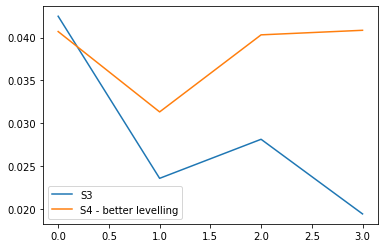

In [25]:
plt.plot(m3, label="S3");
plt.plot(m4, label="S4 - better levelling");
plt.legend();

For uncertaintiy purposes lets assume worst case 1.5 µm, with 